In [1]:
import cv2
import numpy as np

In [4]:
# Load YOLO network
## yolov3.weights 용량이 100메가 이상으로 깃헙에 올리지 말것!!!
net = cv2.dnn.readNet('./data/yolov3.weights', './data/yolov3.cfg')
classes = [] 
with open('./data/coco.names', 'r') as f: 
    classes = [line.strip() for line in f.readlines()] 
layer_names = net.getLayerNames() 
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()] 
colors = np.random.uniform(0, 255, size=(len(classes), 3))


IndexError: invalid index to scalar variable.

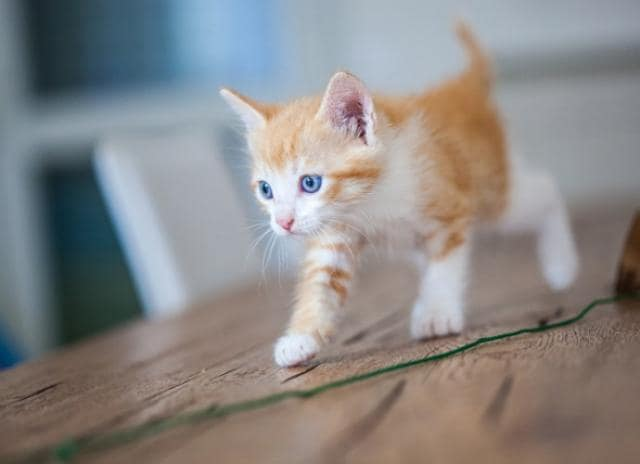

In [23]:
from IPython.display import Image

# Loading image 
img = cv2.imread('./image/kitty.jpg') 
#img = cv2.resize(img, None, fx=0.4, fy=0.4) 
height, width, channels = img.shape

Image('./image/kitty.jpg')

In [25]:
# Detecting objects 
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False) 
net.setInput(blob) 
outs = net.forward(output_layers)

In [26]:
# Showing informations on the screen 
class_ids = [] 
confidences = [] 
boxes = [] 

for out in outs: 
    for detection in out: 
        scores = detection[5:] 
        class_id = np.argmax(scores) 
        confidence = scores[class_id] 
        if confidence > 0.5: 
            # Object detected 
            center_x = int(detection[0] * width) 
            center_y = int(detection[1] * height) 
            w = int(detection[2] * width) 
            h = int(detection[3] * height) 
            # Rectangle coordinates 
            x = int(center_x - w / 2) 
            y = int(center_y - h / 2) 
            boxes.append([x, y, w, h]) 
            confidences.append(float(confidence)) 
            class_ids.append(class_id)


In [27]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [35]:
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_PLAIN 
for i in range(len(boxes)): 
    if i in indexes: 
        x, y, w, h = boxes[i] 
        label = str(classes[class_ids[i]]) 
        color = colors[i] 
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) 
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3) 


# plt.imshow(img)
# plt.show()
cv2.imshow("Image", img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

array([[[136, 125, 111],
        [133, 122, 108],
        [130, 119, 105],
        ...,
        [154, 142, 136],
        [154, 142, 136],
        [154, 142, 136]],

       [[136, 125, 111],
        [133, 122, 108],
        [130, 119, 105],
        ...,
        [155, 143, 137],
        [154, 142, 136],
        [154, 142, 136]],

       [[137, 126, 112],
        [134, 123, 109],
        [130, 119, 105],
        ...,
        [155, 143, 137],
        [155, 143, 137],
        [154, 142, 136]],

       ...,

       [[ 53,  69,  76],
        [ 53,  69,  76],
        [ 53,  69,  76],
        ...,
        [ 87, 100, 122],
        [ 87, 100, 122],
        [ 87, 100, 122]],

       [[ 52,  68,  75],
        [ 52,  68,  75],
        [ 52,  68,  75],
        ...,
        [ 86,  99, 121],
        [ 86,  99, 121],
        [ 86,  99, 121]],

       [[ 52,  68,  75],
        [ 52,  68,  75],
        [ 52,  68,  75],
        ...,
        [ 86,  99, 121],
        [ 86,  99, 121],
        [ 86,  99, 121]]